In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. loading data

In [2]:
data=pd.read_csv(r"C:\Users\anoop\Dropbox\PC\Downloads\titanic_dataset.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. Make ‘PassengerId’ as the index column

In [4]:
data.set_index('PassengerId',inplace=True)

In [5]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3. Checking the basic details of the dataset

In [6]:
data.shape

(891, 11)

insights: There are 891 rows and 11 columns

    

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


insights: 
There are some missing values in age and cabin columns.
Out of 11 columns, 2 columns are of floating datatype, 4 columns are of int datatype and 5 columns are of object datatype.


In [8]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

# 4. Fill in all the missing values present in all the columns in the dataset

In [9]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
data['Age']=data['Age'].fillna(data['Age'].median())
data['Cabin']=data['Cabin'].fillna(value='Not Given')
data['Embarked']=data['Embarked'].fillna(value='Not Given')

In [11]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

# 5. Managing Outliers

Text(0.5, 1.0, 'boxplot of pclass column')

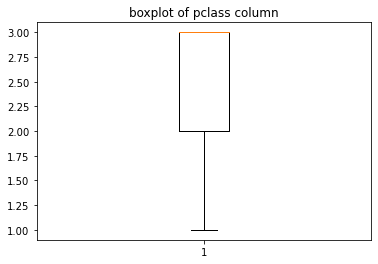

In [12]:
plt.boxplot(data['Pclass'])
plt.title('boxplot of pclass column')

Text(0.5, 1.0, 'boxplot of Fare column')

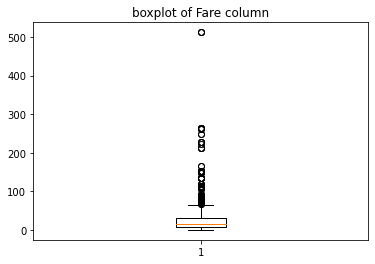

In [13]:
plt.boxplot(data['Fare'])
plt.title('boxplot of Fare column')

In [14]:
Q1=np.percentile(data['Fare'], 25, interpolation='midpoint')
Q2=np.percentile(data['Fare'], 50, interpolation='midpoint')
Q3=np.percentile(data['Fare'], 75, interpolation='midpoint')

In [15]:
print(Q1)
print(Q2)
print(Q3)

7.9104
14.4542
31.0


In [16]:
IQR= Q3-Q1
print(IQR)

23.0896


In [17]:
lower_lim = Q1-1.5*IQR
up_lim= Q3+1.5*IQR

In [18]:
print(lower_lim)
print(up_lim)

-26.724
65.6344


In [19]:
outlier= []
for x in data['Fare']:
    if((x>up_lim) or (x<lower_lim)):
        outlier.append(x)

In [20]:
outlier

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 146.5208,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 153.4625,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 75.25,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 263.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 79.2,
 78.2667,
 153.4625,
 77.9583,
 69.3,
 76.7292,
 73.5,
 113.275,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 71.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 80.0,
 83.1583,
 6

Text(0.5, 1.0, 'boxplot of SibSp column')

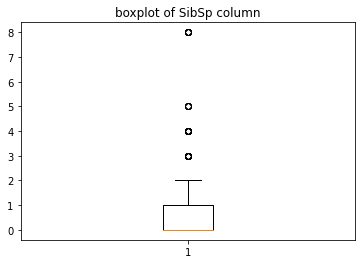

In [21]:
plt.boxplot(data['SibSp'])
plt.title('boxplot of SibSp column')

In [22]:
Q1=np.percentile(data['SibSp'], 25, interpolation='midpoint')
Q2=np.percentile(data['SibSp'], 50, interpolation='midpoint')
Q3=np.percentile(data['SibSp'], 75, interpolation='midpoint')

In [23]:
print(Q1)
print(Q2)
print(Q3)

0.0
0.0
1.0


In [24]:
IQR=Q3-Q1

In [25]:
lower_lim = Q1-1.5*IQR
up_lim= Q3+1.5*IQR

In [26]:
print(lower_lim)
print(up_lim)

-1.5
2.5


In [27]:
outlier= []
for x in data['SibSp']:
    if((x>up_lim) or (x<lower_lim)):
        outlier.append(x)

In [28]:
outlier

[3,
 4,
 3,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 3,
 4,
 8,
 4,
 4,
 3,
 8,
 4,
 8,
 3,
 4,
 4,
 4,
 4,
 8,
 3,
 3,
 5,
 3,
 5,
 3,
 4,
 4,
 3,
 3,
 5,
 4,
 3,
 4,
 8,
 4,
 3,
 4,
 8,
 4,
 8]

# 6. Min Max Scaling

In [29]:
x1=data.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)

In [30]:
x1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,0,3,22.0,1,0,7.2500
2,1,1,38.0,1,0,71.2833
3,1,3,26.0,0,0,7.9250
4,1,1,35.0,1,0,53.1000
5,0,3,35.0,0,0,8.0500


In [31]:
x= x1.drop('Survived', axis=1)
y= x1['Survived']

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
min_max_scaler= MinMaxScaler(feature_range=(0,1))

In [34]:
x1= min_max_scaler.fit_transform(x1)

In [35]:
type(x1)

numpy.ndarray

In [36]:
x1=pd.DataFrame(x1, columns=['Survived','Pclass','Age','SibSp','Parch','Fare'])
x1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0.0,1.0,0.271174,0.125,0.0,0.014151
1,1.0,0.0,0.472229,0.125,0.0,0.139136
2,1.0,1.0,0.321438,0.000,0.0,0.015469
3,1.0,0.0,0.434531,0.125,0.0,0.103644
4,0.0,1.0,0.434531,0.000,0.0,0.015713


In [37]:
x1.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,0.654321,0.363679,0.065376,0.063599,0.062858
std,0.486592,0.418036,0.163605,0.137843,0.134343,0.096995
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.271174,0.000000,0.000000,0.015440
50%,0.000000,1.000000,0.346569,0.000000,0.000000,0.028213
75%,1.000000,1.000000,0.434531,0.125000,0.000000,0.060508
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,random_state= 42,test_size=0.20)

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
lr= LinearRegression()
model= lr.fit(x_train,y_train)
predictions=model.predict(x_test)

In [41]:
from sklearn.metrics import mean_squared_error, r2_score

In [42]:
print('mean square error is:', mean_squared_error(y_test, predictions))
print('R square value is:',r2_score(y_test, predictions))

mean square error is: 0.1869278524055185
R square value is: 0.2291691996235239
